# Acetic Acid Titration

**This exercise is inspired by Ziad, 2021-05-13**

In [11]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

## Linear Regression Function

You don't have to understand the math of the regression in order to use this function.

Call `help(my_lin_reg)` to get instructions how to use it.

In [12]:
# linear regression
def my_lin_reg(xs,ys,xr):
    '''
    yr = my_lin_reg(xs,ys,xr)
    Linear regression approximating the N points (xs,ys)_k
    The resulting linear function is evaluated at coordinates xr yielding yr. The points (xr,yr) make the regression line.
    '''
    A = np.vstack([xs, np.ones(len(xs))]).T
    m, c = np.linalg.lstsq(A, ys, rcond=None)[0]
    yr = m*xr + c
    return yr

## Write data to CSV file

Needed only once. You should store data in seperate data files persistently and not in notebooks. You could use a simple text file in CSV format. CSV means: "comma separated values". Instead of comma I am often using semicolon as field separator. In the example below I am using comma ... 


In [13]:
#X =np.array([x,y]).T
#np.savetxt(filename,X,fmt='%.3f',delimiter=",")

## Read data from CSV file

In [14]:
help(np.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
        The char

In [15]:
filename = "acetic_acid_titration.csv"

In [16]:
X = np.loadtxt(filename,delimiter=",",comments='#' )
x = X[:,0]
y = X[:,1]

## Plot

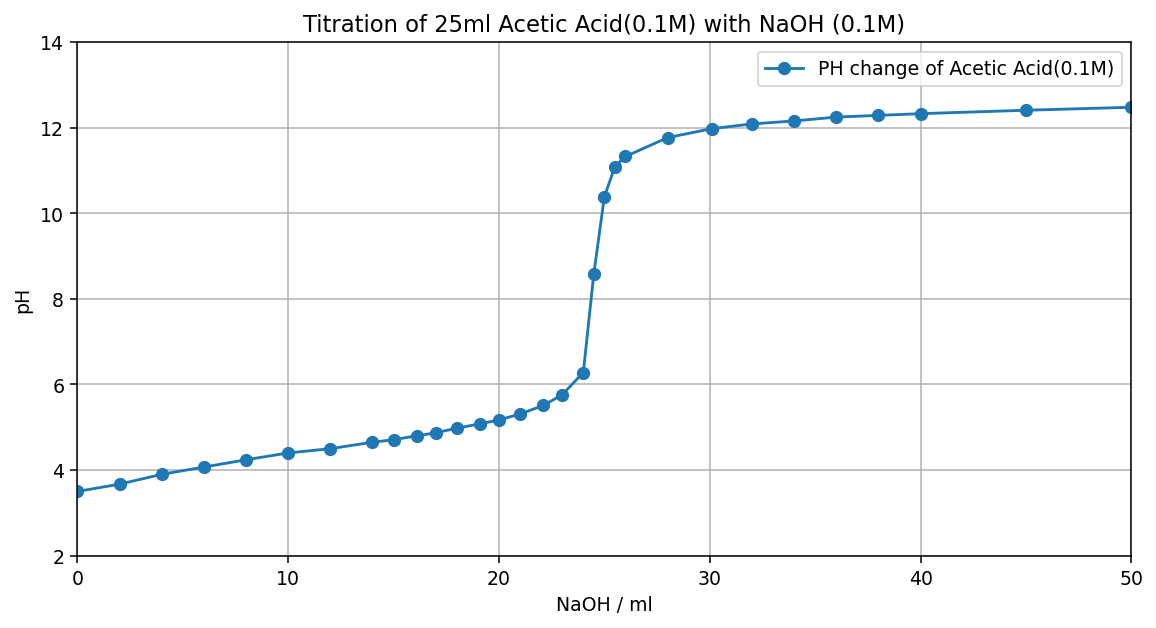

In [17]:
fig1, ax1 = plt.subplots(figsize=(10,5), dpi=136)
ax1.plot(x, y, "o-")
ax1.set_xlabel("NaOH / ml")
ax1.set_ylabel("pH")
ax1.set_xlim([0,50])
ax1.set_ylim([2,14])
ax1.set_title("Titration of 25ml Acetic Acid(0.1M) with NaOH (0.1M)")
ax1.grid(True)
ax1.legend(["PH change of Acetic Acid(0.1M)"])
fig1.savefig("Acetic_Acid_Titration.png")
plt.show()

In [18]:
help(my_lin_reg)

Help on function my_lin_reg in module __main__:

my_lin_reg(xs, ys, xr)
    yr = my_lin_reg(xs,ys,xr)
    Linear regression approximating the N points (xs,ys)_k
    The resulting linear function is evaluated at coordinates xr yielding yr. The points (xr,yr) make the regression line.



## Construction of the linear regression line coming from the left

In [19]:
idxL = np.arange(0,5) # take the first 5 points from the left, i.e. index 0 to index 5. THIS IS NOT THE BEST CHOICE! Play with it!

xsL = x[idxL] # (xs,ys) sample points the linear regression should approximate
ysL = y[idxL] # 

xrL = np.linspace(0,30,2) # the x coordinates at which the regression line is drawn (just two points needed: start - end, you can use more, if you want ...)
yrL = my_lin_reg(xsL,ysL,xrL) # Perform the linear regression

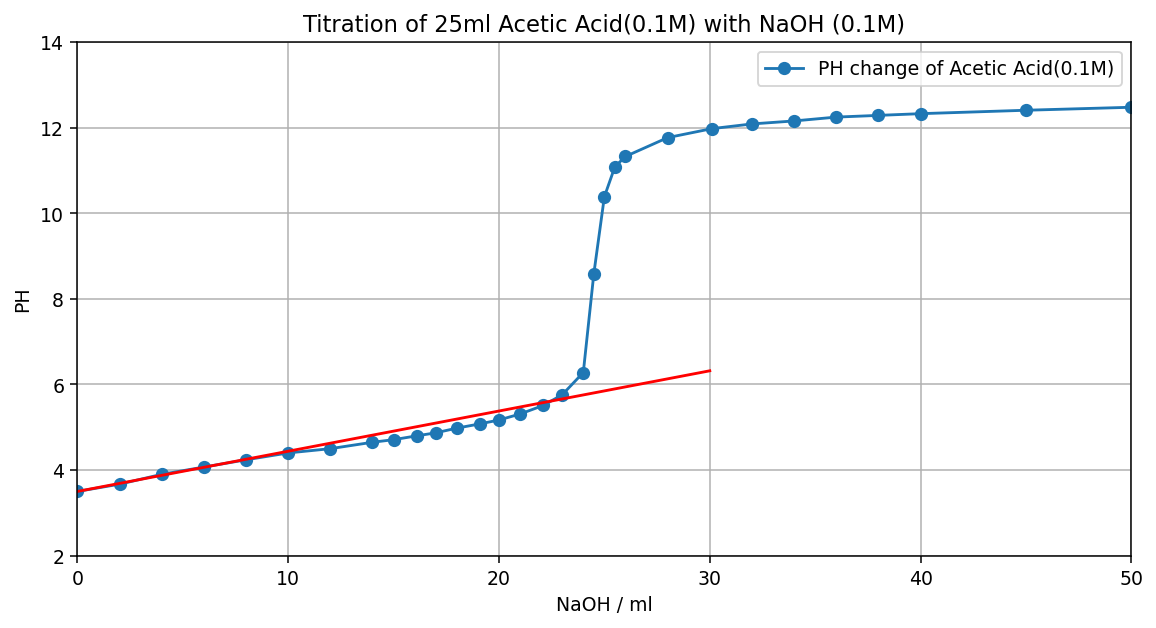

In [20]:
fig2, ax2 = plt.subplots(figsize=(10,5), dpi=136)

ax2.plot(x, y, "o-")

ax2.plot(xrL, yrL, "-r") # regression from left

ax2.set_xlabel("NaOH / ml")
ax2.set_ylabel("PH")
ax2.set_xlim([0,50])
ax2.set_ylim([2,14])
ax2.set_title("Titration of 25ml Acetic Acid(0.1M) with NaOH (0.1M)")
ax2.grid(True)
ax2.legend(["PH change of Acetic Acid(0.1M)"])
fig2.savefig("Acetic_Acid_Titration_Regression.png")
plt.show()

## Exercise: Draw the other two regression lines!

You have a left, middle and right regression line. find the right index ranges:

```
idxL = np.arange(0,5) # take the first 5 points from the left, i.e. index 0 to index 5. THIS IS NOT THE BEST CHOICE! Play with it!

idxM = ... # index set for the middle regression line including the inflection point 

idxR = ... # points from the right for the right regression line

```